____

# <font color=#FFAA11> Hydrodynamic No Conductivity Model </font>

The TTM considered here is given by
$$\begin{align}
c_e \frac{\partial T_e}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_e \frac{\partial T_e}{\partial r}\right) - G (T_e - T_i), \\
c_i\frac{\partial T_i}{\partial t} &= \frac{1}{r}\frac{\partial}{\partial r}\left(r k_i \frac{\partial T_i}{\partial r}\right) + G (T_e - T_i),
\end{align}
$$
which assumes a cylindrical plasma composed of electrons and ions with no mass flow. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from physics import JT_GMS, SMT
from constants import *
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from exp_setup import Cylindrical_Grid, Experiment
# from TTM_solver import TwoTemperatureModel
from Hydro_solver import HydroModel

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

ModuleNotFoundError: No module named 'physics'

# Create Experimental Information

In [51]:
grid  = Cylindrical_Grid(500e-6, N=300) 
Zstar, A = 2, 4
Te_initial, Ti_initial = 14.79e3, 8.83e3 #[K]
laser_width = 100e-6 # [m]
n0 = 1.83e21 *1e6

dih_file = "/home/zach/plasma/TTM/data/He5bar_DIH_profile_data.txt"


# Create Experimental layout and TTM solver
Helium_jt = Experiment(grid, n0, Zstar, A, Te_initial, Ti_initial,laser_width, gas_name='Helium', model = "JT",
                     ion_temperature_model = 'gaussian', ion_temperature_file = dih_file)
hydro_jt = HydroModel(Helium_jt, model = "JT")

# Helium_smt = Experiment(grid, n0, Zstar, A, Te_initial, Ti_initial,laser_width, gas_name='Helium', model = "SMT",
#                       ion_temperature_model = 'gaussian', ion_temperature_file = dih_file)
# ttm_smt = TwoTemperatureModel(Helium_smt, model = "SMT")

Initial peak T_electron converged:  [19585.87299045] True The solution converged.
Te_max = 1.959e+04 K
Using gaussian model for Ti: Ti_max = 1.169e+04 K


In [52]:
print("JT Model")
hydro_jt.make_times()
hydro_jt.print_timescales()

# print("\nSMT Model")
# ttm_smt.make_times()
# ttm_smt.print_timescales()

JT Model

Simulation time: 3.2e-01 ns,  dt = 6.4e+00 ps, steps = 50
  Diffusion time (r_max): e:1.4e+05 ns, i:9.5e+46 ns 
  Diffusion time (dr): e:1.6e+00 ns, i:1.1e+42 ns 
  Thermalization Times: 6.39e+01 ps  6.39e+01 ps


# Solve Two Temperature Model

In [53]:
# hydro_jt.solve_hydro(dt = 1e-12,tmax=0.83e-9)
hydro_jt.solve_hydro(dt = 1e-12,tmax=10e-9)
# ttm_smt.solve_TTM(tmax=0.83e-9)

# PLOTS

In [54]:
def plot_temp_profiles(ttm, plot_times = None, ax = None, title=''):

    if plot_times is None:
        plot_times = (np.linspace(0,len(ttm.t_list)*0.99,num=4,endpoint=True)).astype(int)  # Intermediate times for plotting        
        
    # Plot temperature profiles at intermediate times
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(14,10),facecolor='w')
    
    plot_idx = 0
    for plot_idx, ti in enumerate(plot_times):
        t = ttm.t_list[ti]
        ax.plot(grid.cell_centers*1e6, ttm.Te_list[ti][:-1]*1e-3, '--', color=colors[plot_idx], label=f"$T_e$: t={t*1e9:.1e} [ns]")
        ax.plot(grid.cell_centers*1e6, ttm.Ti_list[ti][:-1]*1e-3, '-' , color=colors[plot_idx], label=f"$T_i$: t={t*1e9:.1e} [ns]")
        # plot_idx += 1


    # Plot settings
    ax.set_xlabel(r"Radial distance [$\mu$m]",fontsize=20)
    ax.set_ylabel("Temperature [kK]",fontsize=20)
    ax.tick_params(labelsize=20)
    ax.set_xlim(0,100)
    # ax.set_ylim(0,10.1)
    ax.legend(fontsize=15)
    ax.grid(alpha = 0.3)
    ax.set_title(title, fontsize=20)


In [55]:
flux_Ek_e = 2*π*hydro_jt.grid.r * hydro_jt.v * hydro_jt.Ek_e
net_flux_Ek_e = flux_Ek_e[1:]  - flux_Ek_e[:-1]
-hydro_jt.dt * (net_flux_Ek_e/hydro_jt.grid.cell_volumes)/hydro_jt.Ek_e[:-1]

array([-8.26437275e-05, -8.26067539e-05, -8.24235966e-05, -8.22229240e-05,
       -8.19214102e-05, -8.15394440e-05, -8.11123355e-05, -8.05672198e-05,
       -7.99727170e-05, -7.92925434e-05, -7.85113669e-05, -7.76669483e-05,
       -7.67298866e-05, -7.56868498e-05, -7.45632693e-05, -7.33489377e-05,
       -7.20179169e-05, -7.05770813e-05, -6.90403677e-05, -6.73930436e-05,
       -6.56097104e-05, -6.36865389e-05, -6.16375977e-05, -5.94665773e-05,
       -5.71525346e-05, -5.46626563e-05, -5.19748533e-05, -4.90890970e-05,
       -4.60219029e-05, -4.27914567e-05, -3.94049175e-05, -3.58528420e-05,
       -3.21114579e-05, -2.81480401e-05, -2.39266888e-05, -1.94117170e-05,
       -1.45686865e-05, -9.36346653e-06, -3.76014323e-06,  2.28152467e-06,
        8.80883483e-06,  1.58787602e-05,  2.35603131e-05,  3.19360026e-05,
        4.11011420e-05,  5.11583440e-05,  6.22026206e-05,  7.42901145e-05,
        8.73825410e-05,  1.01263921e-04,  1.15441812e-04,  1.29073157e-04,
        1.40981879e-04,  

In [60]:
hydro_jt.v*1e-9*1e6

array([0.00000000e+00, 1.38229825e-01, 2.76534439e-01, 4.14625972e-01,
       5.52618692e-01, 6.90357774e-01, 8.27745450e-01, 9.64816897e-01,
       1.10136299e+00, 1.23739789e+00, 1.37283554e+00, 1.50753083e+00,
       1.64146610e+00, 1.77454605e+00, 1.90662799e+00, 2.03765172e+00,
       2.16754321e+00, 2.29615388e+00, 2.42335250e+00, 2.54905938e+00,
       2.67316926e+00, 2.79551059e+00, 2.91589874e+00, 3.03419189e+00,
       3.15027357e+00, 3.26398863e+00, 3.37510476e+00, 3.48333163e+00,
       3.58837440e+00, 3.68997774e+00, 3.78793480e+00, 3.88206250e+00,
       3.97216136e+00, 4.05797832e+00, 4.13918242e+00, 4.21535421e+00,
       4.28598389e+00, 4.35047238e+00, 4.40813046e+00, 4.45817348e+00,
       4.49971080e+00, 4.53173009e+00, 4.55307722e+00, 4.56243307e+00,
       4.55828889e+00, 4.53892371e+00, 4.50238999e+00, 4.44651878e+00,
       4.36896436e+00, 4.26731944e+00, 4.13934461e+00, 3.98335718e+00,
       3.79879670e+00, 3.58690297e+00, 3.35130826e+00, 3.09822583e+00,
      

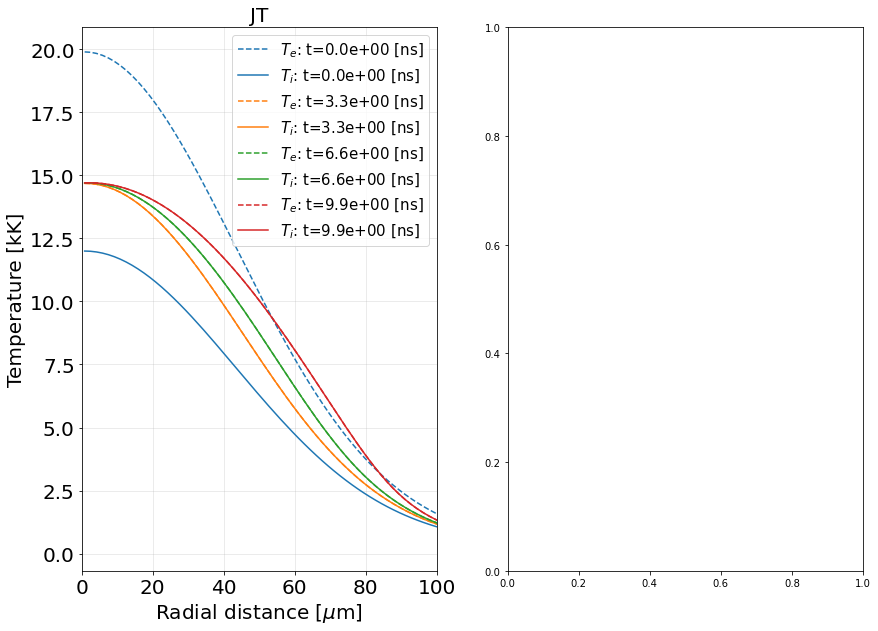

In [57]:
fig, ax = plt.subplots(1,2, figsize=(14,10),facecolor='w')

plot_temp_profiles(hydro_jt, ax = ax[0], title='JT')
# plot_temp_profiles(ttm_smt,  ax = ax[1], title='SMT')


In [22]:
He_data = read_csv("./data/experimental_data/He_74bar_Te.txt", delim_whitespace=True, header=1)
He_data

,t[ns],T[kK]
0,0.003175,14.790528
1,0.007937,14.571949
2,0.010317,14.298725
3,0.020635,14.089253
4,0.020635,13.897996
...,...,...
59,0.792063,10.582878
60,0.817460,10.783242
61,0.847619,10.428051
62,0.864286,10.719490


In [17]:
from scipy.optimize import curve_fit

def T_fit_form(t, Te_0, Ti_0, d, τei):
    ΔT0 = (Te_0-Ti_0)
    ΣT0 = (Te_0+Ti_0)
    return ΣT0/2 - d*t + ΔT0/2*np.exp(-2*t/τei)

def T_DIHfit_form(t, Te_0, d, τei):
    Ti_0 = Ti_initial
    ΔT0 = (Te_0-Ti_0)
    ΣT0 = (Te_0+Ti_0)
    return ΣT0/2 - d*t + ΔT0/2*np.exp(-2*t/τei)

Te0_fit, Ti0_fit, d_fit, τei_fit = curve_fit(T_fit_form, He_data['t[ns]'], He_data['T[kK]'] , maxfev=int(1e4))[0]
Te0_DIHfit, d_DIHfit, τei_DIHfit = curve_fit(T_DIHfit_form, He_data['t[ns]'], He_data['T[kK]'] , maxfev=int(1e4))[0]
Te0_DIHfit, d_DIHfit, τei_DIHfit

(12.91101238403583, 3.921206001431775, 15503.800441490777)

In [18]:
def plot_bulk_temperature(ttm, exp, plot_times = None, ax = None, title=''):
    bulk_Tes = np.array([exp.get_bulk_T(Te, ttm.n_e) for Te in ttm.Te_list])
    bulk_Tis = np.array([exp.get_bulk_T(Ti, ttm.n_e) for Ti in ttm.Ti_list]) # Use Zstar weighted density? i.e. use ne not ni
    
    T_av = 0.5*(bulk_Tes + bulk_Tis)
    ti_1, ti_2 = -100, -1

    T_av_1 = T_av[ti_1]
    T_av_2 = T_av[ti_2]

    dT_dt  = (T_av_2 - T_av_1)/(ttm.t_list[ti_2] - ttm.t_list[ti_1])

    T_eq_line  = np.array(T_av_1 + dT_dt*(ttm.t_list-ttm.t_list[ti_1]))


    ax.plot(np.array(ttm.t_list)*1e9, bulk_Tes*1e-3,label=r"$T_e$ (bulk)")
    ax.plot(np.array(ttm.t_list)*1e9, bulk_Tis*1e-3,label=r"$T_i$ (bulk)")
    ax.plot(np.array(ttm.t_list)*1e9, T_eq_line*1e-3,'--k',label='Linear Diffusion line')
#     ax.plot(np.array(ttm.t_list)*1e9, T_av*1e-3,'-k',label='Average (initial: T={0:.2f} [kK])'.format(T_av[0]*1e-3))
    
#     bulk_T_exp_fit = (Te_initial + Ti_initial)/2 - 0.5*120*1e9*ttm.t_list + (Te_initial - Ti_initial)/2 * np.exp(-ttm.t_list/(1470e-12))
#     print(bulk_T_exp_fit)
    ax.plot(ttm.t_list*1e9, T_fit_form(ttm.t_list*1e9, Te0_fit, Ti0_fit, d_fit, τei_fit),'r--' ,label="Experiment Fit")
    ax.plot(ttm.t_list*1e9, T_DIHfit_form(ttm.t_list*1e9, Te0_fit, d_fit, τei_fit),'r-.' ,label="Experiment DIH fixed Fit")
    ax.plot(He_data['t[ns]'], He_data['T[kK]'], 'r-', label='Experiment Data')
    # Thermalization Text
    thermalization_text = r'$\tau_{th}$' + ' = {0:.1f} [ps] (exp 63 ps)'.format(ttm.experiment.τei_Equilibration*1e12)
    thermalization_head_x_pos = 0.5* ttm.experiment.τei_Equilibration*1e9
    thermalization_head_y_pos = bulk_Tes[np.argmin(np.abs(ttm.t_list-thermalization_head_x_pos*1e-9))]*1e-3
    
    thermalization_arrow_head_coords = (thermalization_head_x_pos, thermalization_head_y_pos )
    ax.annotate(thermalization_text, xy=thermalization_arrow_head_coords, xycoords='data',
                xytext=(150, 60), textcoords='offset points',
                va='top', ha='left',fontsize=15,
                arrowprops=dict(facecolor='black', shrink=0.02))

    # Diffusion Text
    diffusion_text = 'Diffusion Estimate:\n dT/dt={0:.2f} [K/ns] (exp -1530 K/ns)'.format(dT_dt*1e-9)
    diffusion_head_x_pos = 0.5*ttm.tmax*1e9
    diffusion_head_y_pos = 0.1 + bulk_Tes[np.argmin(np.abs(ttm.t_list-diffusion_head_x_pos*1e-9))]*1e-3
    
    diffusion_arrow_head_coords = (diffusion_head_x_pos, diffusion_head_y_pos )
    ax.annotate(diffusion_text, xy=diffusion_arrow_head_coords, xycoords='data',
                xytext=(60, -30), textcoords='offset points',
                va='top', ha='left',fontsize=15,
                arrowprops=dict(facecolor='black', shrink=0.02))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # place a text box in upper left in axes coords
    fit_string =  (r"My fit: $τ_{{ei}}$ = {0:.1f} [ps]".format(τei_fit*1e3) + '\n'+
                   r" $dT_e/dt$ = -{0:.1f} K/ns".format(d_fit*1e3) + '\n' +
                   r" $T^{{\rm init}}_e$ = {0:.2f} [kK]".format(Te0_fit) + '\n' +
                   r" $T^{{\rm init}}_i$ = {0:.2f} [kK]".format(Ti0_fit)

                  )
    ax.text(0.5, 0.95, fit_string, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)



    # Plot settings
    ax.set_xlabel(r"Time [ns]", fontsize=20)
    ax.set_ylabel("Temperature [kK]",fontsize=20)
    ax.tick_params(labelsize=20)
    ax.set_xlim(-0.01,ttm.tmax*1e9)
    ax.set_ylim(9,15)

    ax.set_title(title,fontsize=20)
    ax.legend(fontsize=14)
    ax.grid(alpha=0.3)


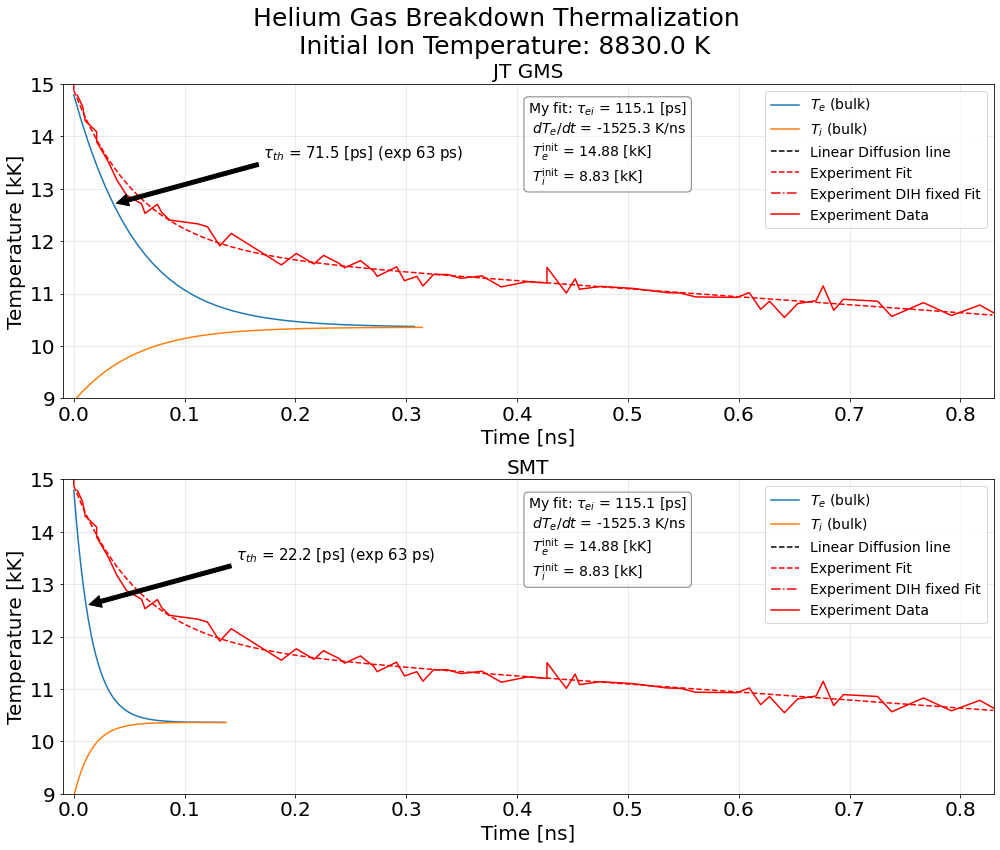

In [19]:
fig, ax = plt.subplots(2,1, figsize=(14,12),facecolor='w')
fig.suptitle('Helium Gas Breakdown Thermalization \n Initial Ion Temperature: {0:.1f} K'.format(Ti_initial),fontsize=25)
# fig.suptitle('Helium Gas Breakdown Thermalization \n MD DIH $T_i$'.format(Ti_initial),fontsize=25)

plot_bulk_temperature(ttm_jt, Helium_jt, ax = ax[0], title='JT GMS')
plot_bulk_temperature(ttm_smt, Helium_smt,  ax = ax[1], title='SMT')
fig.tight_layout()

# Adiabatic Expansion

"Collisionless expansion of a Gaussian plasma
into a vacuum" Mora


$$\frac{d \ln T_e}{dt} = 2 \frac{d \ln n_e}{dt}$$

In a cylindrical plasma with $n\propto 1/R^2$
$$\frac{d \ln T_e}{dt} = - 4 \frac{d \ln R}{dt}$$


In [23]:
dT_dt_exp = -1530 # K/ns
R0 = 25e-6 # m
Rdot =  -4*R0* dT_dt_exp/11e4
print("He expanding at {0:.3f} μm per ns".format(Rdot*1e6))

He expanding at 1.391 μm per ns
